In [1]:
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16, 9)

from hdim import HDIM, HDIM_Dataset

In [2]:
files = sorted(glob('data/trades_*.csv'))

In [3]:
s = []
r = []
e = []

for file in files:
    data = pd.read_csv(file)
    r.append(np.diff(np.log(data.midprice.values)))
    s.append(data.side.values[:-1])
    e.append(data.is_price_cancelling.values[:-1])

In [4]:
n = 100
model = HDIM(n=n, method='sgd')
model.fit(s, e, r)
model.score(s[-5:], e[-5:], r[-5:])

0.7926641795916957

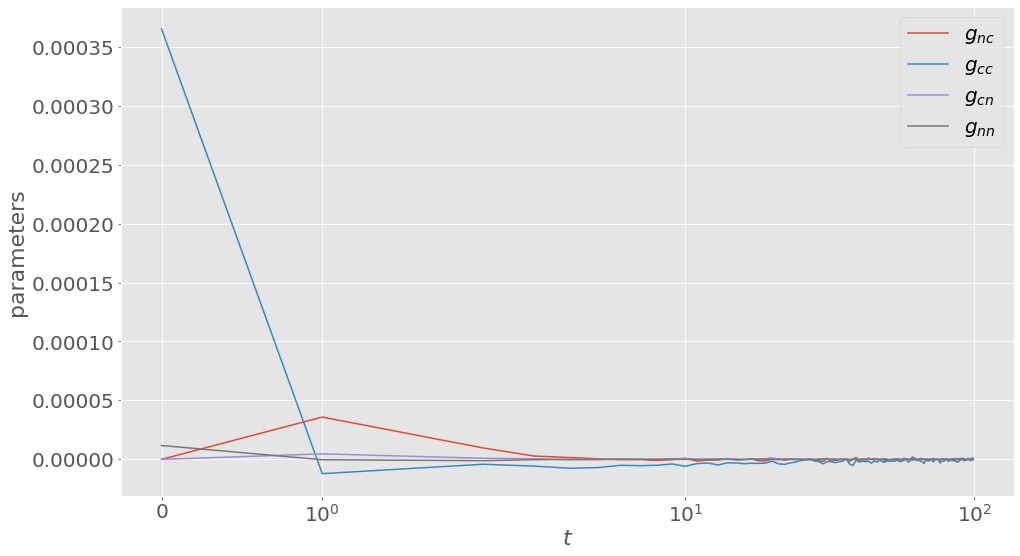

In [5]:
x = np.arange(0,n)
y = model.parameters['nc']

plt.plot(x, y)

y = model.parameters['cc']

plt.plot(x, y)

y = model.parameters['cn']

plt.plot(x, y)

y = model.parameters['nn']

plt.plot(x, y)

plt.xscale('symlog')
plt.legend([
    '$g_{nc}$',
    '$g_{cc}$',
    '$g_{cn}$',
    '$g_{nn}$'
], fontsize=20)
plt.xlabel('$t$', fontsize=22)
plt.ylabel('parameters', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('hdim_params')
plt.show()

In [6]:
params_count = []
r2 = []

for n in [1, 2, 4, 6, 8] + list(np.arange(16, 512, 64)):
    print(n, end=' ')
    model = HDIM(n=n, method='sgd')
    model.fit(s[:-5], e[:-5], r[:-5])
    params_count.append(n)
    r2.append(model.score(s[-5:], e[-5:], r[-5:]))

1 2 4 6 8 16 80 144 208 272 336 400 464 

[]

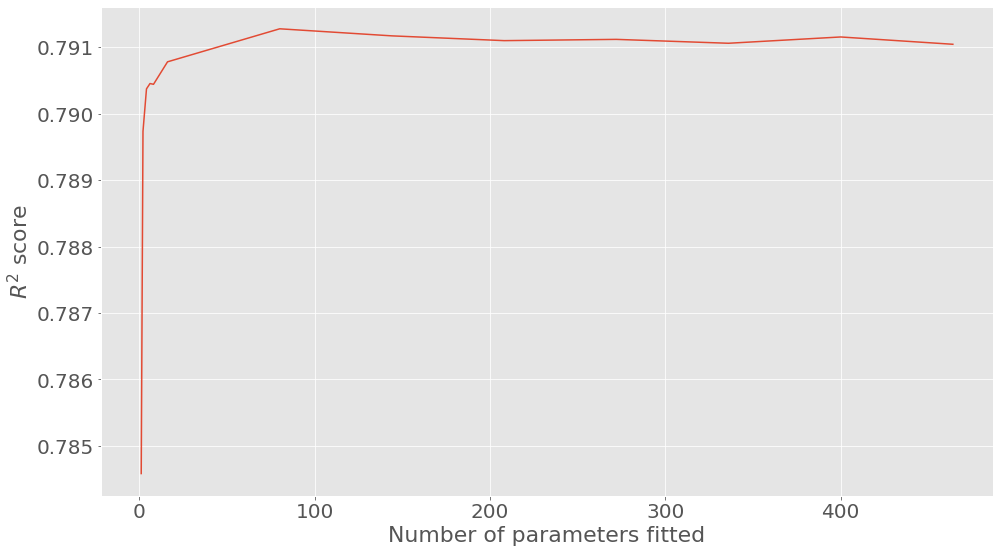

In [7]:
plt.plot(params_count, r2)

plt.xlabel('Number of parameters fitted', fontsize=22)
plt.ylabel('$R^2$ score', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.savefig('hdim_scores')
plt.plot()

In [8]:
r2

[0.7845836559752566,
 0.7897350705602044,
 0.7903749292889176,
 0.7904552322084679,
 0.7904436543938473,
 0.7907820461958063,
 0.7912792432704708,
 0.7911729138735897,
 0.7911010129876926,
 0.7911200471424059,
 0.7910615661283481,
 0.7911562835260673,
 0.7910462448184344]

In [9]:
r2[np.argmax(r2)]

0.7912792432704708

In [10]:
params_count[np.argmax(r2)]

80